# Finance Analysis

## Goal


## Setup

### Importing Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# my ds module
# from ds import plot_boxes, plot_crosstabs, plot_histograms
from ds import plots

### Data

In [2]:
# Load the datasets
df_new = pd.read_csv('data/application_data.csv')
df_pre = pd.read_csv('data/previous_application.csv')

In [3]:
# Display the first few rows of the datasets
print(df_new.head())
print(df_pre.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [4]:
df_pre.shape, df_new.shape

((1670214, 37), (307511, 122))

In [5]:
df_new.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [6]:
print(df_new.describe(include='all').T)

                               count unique         top    freq  \
SK_ID_CURR                  307511.0    NaN         NaN     NaN   
TARGET                      307511.0    NaN         NaN     NaN   
NAME_CONTRACT_TYPE            307511      2  Cash loans  278232   
CODE_GENDER                   307511      3           F  202448   
FLAG_OWN_CAR                  307511      2           N  202924   
...                              ...    ...         ...     ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0    NaN         NaN     NaN   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0    NaN         NaN     NaN   
AMT_REQ_CREDIT_BUREAU_MON   265992.0    NaN         NaN     NaN   
AMT_REQ_CREDIT_BUREAU_QRT   265992.0    NaN         NaN     NaN   
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0    NaN         NaN     NaN   

                                     mean            std       min       25%  \
SK_ID_CURR                  278180.518577  102790.175348  100002.0  189145.5   
TARGET                           0.

In [7]:
df_new.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
# id_columns = [
# ]

# df = df_pre.drop(id_columns, axis=1)

In [9]:
df_new.duplicated().sum()

0

In [10]:
#checking for missing values in %
df_missingpercent = round((df_new.isnull().sum()*100/len(df_new)).sort_values(ascending=False),2)
print(df_missingpercent)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_HOUSING_TYPE            0.00
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64


In [11]:
df_new.loc[:, df_new.isnull().mean() < 0.3].shape

(307511, 72)

In [12]:
# Dropping columns with more than 50% missing values
threshold = 0.3
df_new = df_new.loc[:, df_new.isnull().mean() < threshold]
df_new.shape


(307511, 72)

In [13]:
# Impute missing values for numeric columns with median
numeric_columns = df_new.select_dtypes(include=[np.number]).columns
df_new[numeric_columns] = df_new[numeric_columns].fillna(df_new[numeric_columns].median())



In [14]:
# Impute missing values for categorical columns with mode
categorical_columns = df_new.select_dtypes(include=['object']).columns
df_new[categorical_columns] = df_new[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))



C:\Users\Sparrow\AppData\Local\Temp\ipykernel_9108\730994906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay["TARGET"] = df_new["TARGET"].map({1:"Delay",0:"On_Time"})


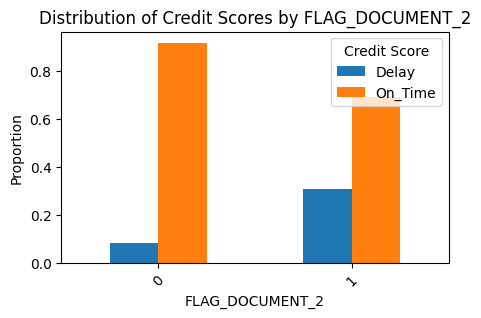

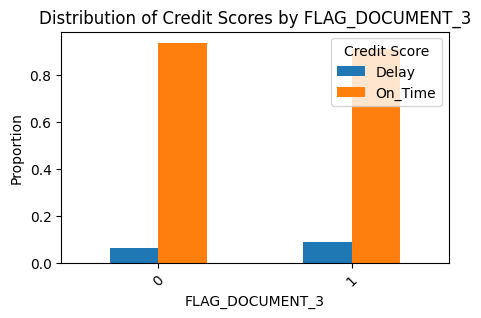

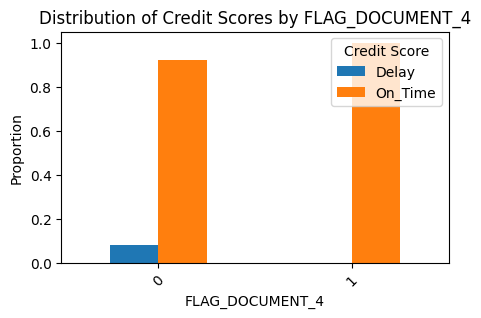

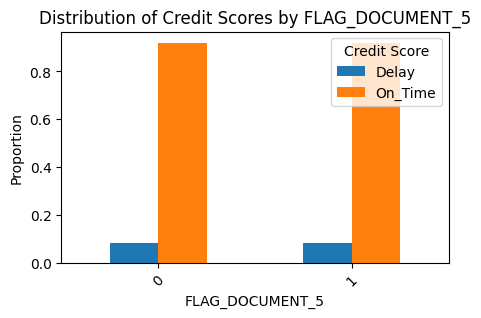

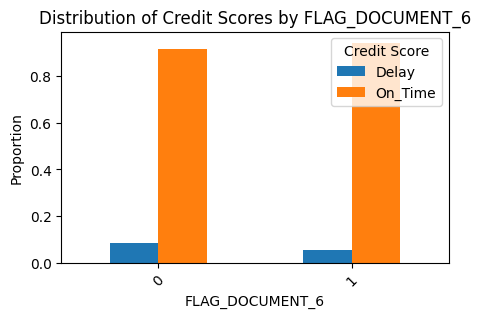

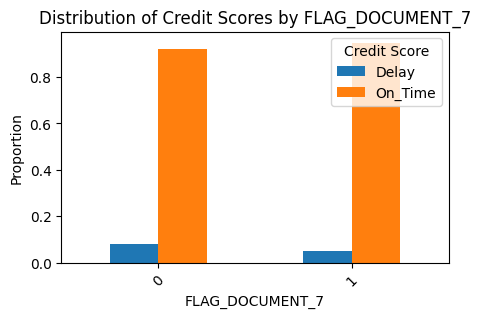

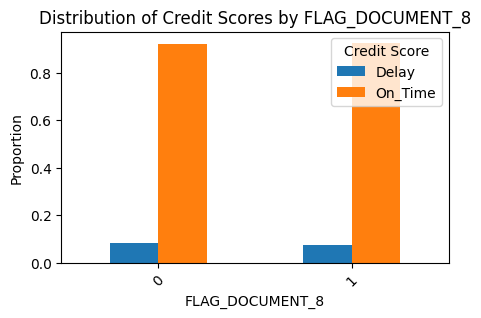

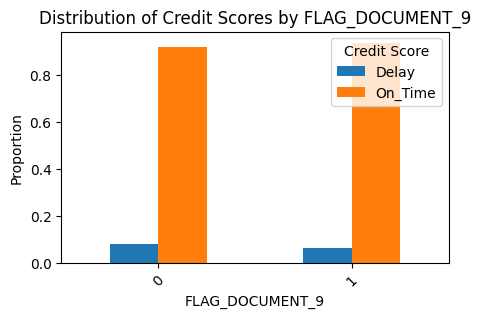

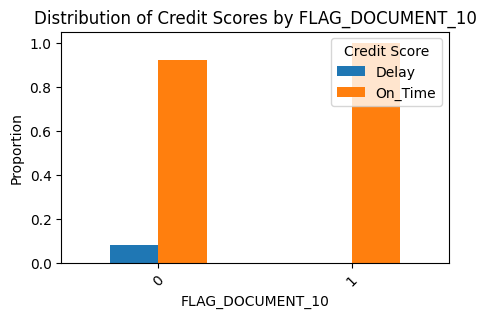

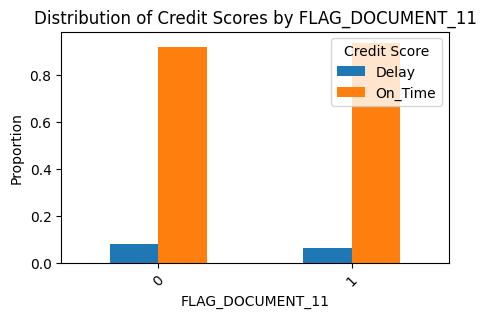

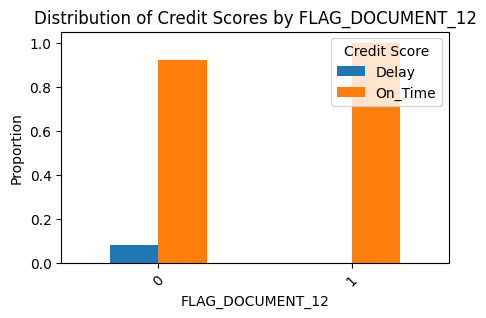

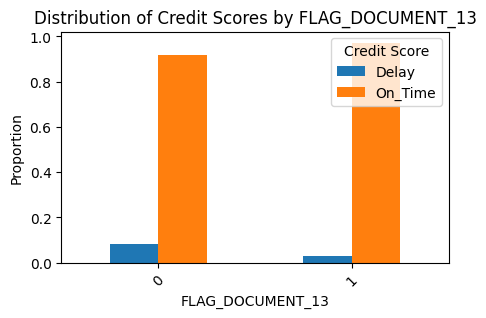

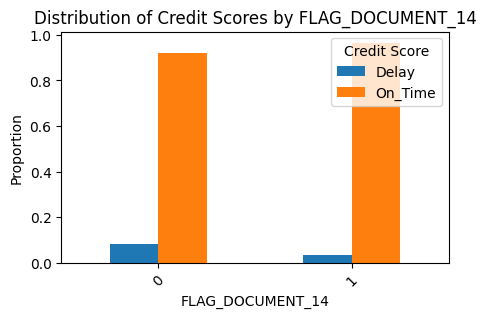

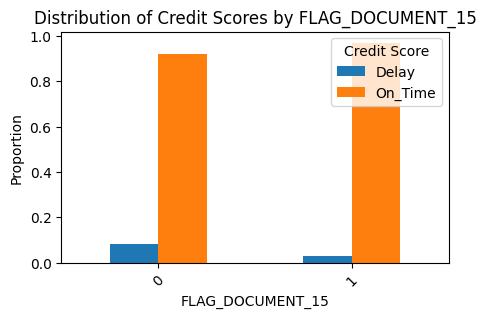

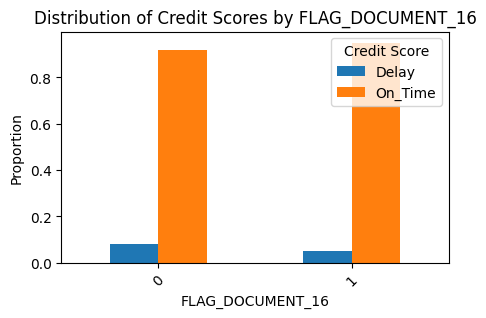

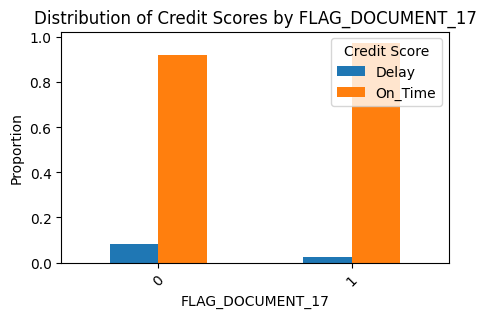

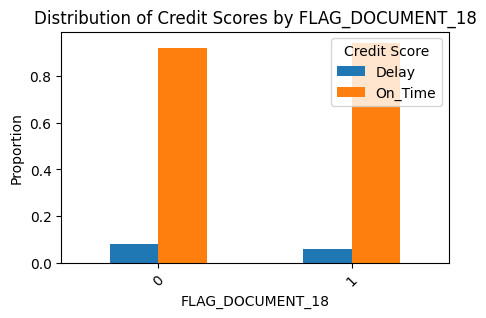

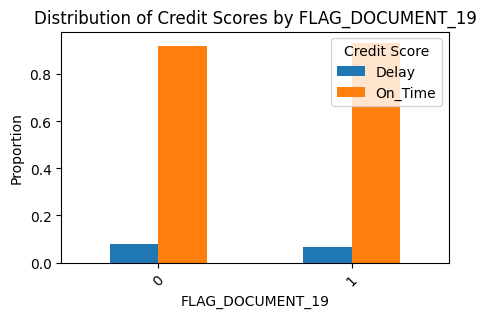

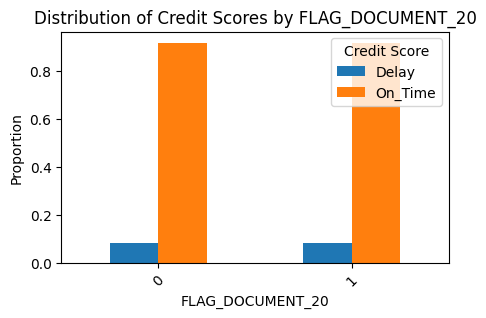

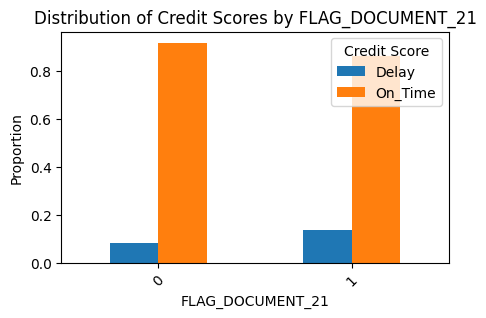

In [15]:
col_docs = [col for col in df_new.columns if col.startswith('FLAG_DOCUMENT')]
length = len(col_docs)

df_delay = df_new[col_docs+["TARGET"]]
df_delay["TARGET"] = df_new["TARGET"].map({1:"Delay",0:"On_Time"})

plots.plot_crosstabs(df_delay, 'TARGET', col_docs)

In [16]:
col_docs.remove('FLAG_DOCUMENT_2')
df_new.drop(col_docs, axis=1, inplace=True)
df_new.shape

(307511, 53)

In [17]:
# Calculate correlation coefficients
correlation = df_new.select_dtypes(include='number').corr()

# Get absolute correlation values with the target
corr_with_target = abs(correlation['TARGET'])

# Define threshold
threshold = 0.01

# Filter columns with correlation above the threshold
filtered_cols = corr_with_target[corr_with_target >= threshold].index

# Filter the DataFrame based on the selected columns (including target)
df_new_corr = df_new[filtered_cols]

# Print the filtered DataFrame
print(df_new_corr)

        TARGET  CNT_CHILDREN  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0            1             0    406597.5      24700.5         351000.0   
1            0             0   1293502.5      35698.5        1129500.0   
2            0             0    135000.0       6750.0         135000.0   
3            0             0    312682.5      29686.5         297000.0   
4            0             0    513000.0      21865.5         513000.0   
...        ...           ...         ...          ...              ...   
307506       0             0    254700.0      27558.0         225000.0   
307507       0             0    269550.0      12001.5         225000.0   
307508       0             0    677664.0      29979.0         585000.0   
307509       1             0    370107.0      20205.0         319500.0   
307510       0             0    675000.0      49117.5         675000.0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                         0.018801       -9461

In [18]:
col_dates = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in col_dates:
    df_new[col] = abs(df_new[col])

In [19]:

df_new['AGE'] = df_new['DAYS_BIRTH'] // 365
df_new['AGE']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: AGE, Length: 307511, dtype: int64

In [20]:
# Save the cleaned data
df_new.to_csv('cleaned_df_new.csv', index=False)
# df_pre.to_csv('cleaned_df_pre.csv', index=False)

The following features were important to group customers.

# SQL Queries

In [21]:
# Load the datasets
df_new = pd.read_csv('cleaned_df_new.csv')
# df_pre = pd.read_csv('cleaned_df_pre.csv')

In [24]:
from sqlalchemy import create_engine
from sqlalchemy import text

# Create in-memory SQLite engine
engine = create_engine('sqlite://', echo=False)  # echo=False to suppress logging

# Create tables in the in-memory database
df_new.to_sql('new', engine, if_exists='replace', index=False)
# df_pre.to_sql('prev', engine, if_exists='replace', index=False)


307511

In [25]:
with engine.connect() as conn:
    result = conn.execute(text("SELECT * FROM new LIMIT 5;"))
    for row in result:
        print(row) 

(100002, 1, 'Cash loans', 'M', 'N', 'Y', 0, 202500.0, 406597.5, 24700.5, 351000.0, 'Unaccompanied', 'Working', 'Secondary / secondary special', 'Single / not married', 'House / apartment', 0.018801, 9461, 637, 3648.0, 2120, 1, 1, 0, 1, 1, 0, 1.0, 2, 2, 'WEDNESDAY', 10, 0, 0, 0, 0, 0, 0, 'Business Entity Type 3', 0.2629485927471776, 0.1393757800997895, 2.0, 2.0, 2.0, 2.0, -1134.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 25)
(100003, 0, 'Cash loans', 'F', 'N', 'N', 0, 270000.0, 1293502.5, 35698.5, 1129500.0, 'Family', 'State servant', 'Higher education', 'Married', 'House / apartment', 0.0035409999999999, 16765, 1188, 1186.0, 291, 1, 1, 0, 1, 1, 0, 2.0, 1, 1, 'MONDAY', 11, 0, 0, 0, 0, 0, 0, 'School', 0.6222457752555098, 0.5352762504724826, 1.0, 0.0, 1.0, 0.0, -828.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 45)
(100004, 0, 'Revolving loans', 'M', 'Y', 'Y', 0, 67500.0, 135000.0, 6750.0, 135000.0, 'Unaccompanied', 'Working', 'Secondary / secondary special', 'Single / not married', 'House / apartment', 0.

Credit Types: Identify the different types of credit offered by the bank.


In [42]:
query = '''SELECT DISTINCT NAME_CONTRACT_TYPE FROM new;'''

with engine.connect() as conn:
    result = conn.execute(text(query))
    for row in result:
        print(row)

('Cash loans',)
('Revolving loans',)


Income Distribution & Descriptive Statistics wrt. Credit Type: Analyze income distribution and statistics for each credit type.


In [ ]:

# query = '''WITH income_stats AS (
#             SELECT NAME_CONTRACT_TYPE,
#                 MIN(AMT_INCOME_TOTAL) AS Min_Income,
#                 MAX(AMT_INCOME_TOTAL) AS Max_Income,
#                 AVG(AMT_INCOME_TOTAL) AS Avg_Income,
#                 SQRT(SUM((AMT_INCOME_TOTAL - AVG(AMT_INCOME_TOTAL)) * (AMT_INCOME_TOTAL - AVG(AMT_INCOME_TOTAL))) / (COUNT(*) - 1)) AS Std_Dev_Income, -- Standard Deviation Calculation
#                 NTILE(4) OVER (PARTITION BY NAME_CONTRACT_TYPE ORDER BY AMT_INCOME_TOTAL) AS Quartile, -- Quartile Calculation
#                 MEDIAN(AMT_INCOME_TOTAL) AS Median_Income
#             FROM new
#             GROUP BY NAME_CONTRACT_TYPE
#         )'''

# with engine.connect() as conn:
#     result = conn.execute(text(query))
#     for row in result:
#         print(row)


Analysis of Goods Amount for Cash Loans: Analyze the loan amounts for clients applying for cash loans.


In [39]:
query = '''SELECT MIN(AMT_GOODS_PRICE) AS Min_Goods_Price,
                MAX(AMT_GOODS_PRICE) AS Max_Goods_Price,
                AVG(AMT_GOODS_PRICE) AS Avg_Goods_Price
            FROM new
            WHERE NAME_CONTRACT_TYPE = 'Cash loans';'''

with engine.connect() as conn:
    result = conn.execute(text(query))
    for row in result:
        print(row)

(40500.0, 4050000.0, 560563.6644850341)


Age Brackets of the Clients: Explore the distribution of clients across different age groups.


In [43]:
query = '''WITH age_brackets AS (
                SELECT 
                    CASE 
                        WHEN AGE BETWEEN 18 AND 25 THEN '18-25'
                        WHEN AGE BETWEEN 26 AND 35 THEN '26-35'
                        WHEN AGE BETWEEN 36 AND 45 THEN '36-45'
                        WHEN AGE BETWEEN 46 AND 55 THEN '46-55'
                        WHEN AGE BETWEEN 56 AND 65 THEN '56-65'
                        ELSE '65+' 
                    END AS age_group,
                    COUNT(*) AS num_clients
                FROM new
                GROUP BY age_group
            )
            SELECT * 
            FROM age_brackets
            ORDER BY age_group; '''

with engine.connect() as conn:
    result = conn.execute(text(query))
    for row in result:
        print(row)

('18-25', 16318)
('26-35', 75925)
('36-45', 83677)
('46-55', 69501)
('56-65', 57081)
('65+', 5009)


Documents Submission Analysis: Analyze the frequency of document submission by clients.


Overall Analysis of Credit Enquiries on Clients: Analyze the number of credit inquiries made by clients before loan application.


Analysis of individual applications based on the credit enquiries: Investigate how credit enquiries vary across individual applications.


Deeper analysis on the Contact reach for clients who had payment difficulties but were from the Very Low Risk 

social surroundings: Analyze the contact reach effectiveness for clients with payment issues but residing in low-risk environments.


Integration of previous application data: Integrate insights from the previous_application.csv data to enhance risk assessment.


Top 15 customers and contact reach: Identify the top 15 clients and analyze their contact reach.
